In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
uybor = pd.read_excel('/data/uybor.xlsx')
uybor.head(10)

,address,district,rooms,size,level,max_levels,price,lat,lng
0,"город Ташкент, Yunusobod район, Юнусабад 8-й к...",Yunusobod,3,57.0,4,4,52000,41.371471,69.281049
1,"город Ташкент, Yakkasaroy район, 1-й тупик Шот...",Yakkasaroy,2,52.0,4,5,56000,41.291115,69.261104
2,"город Ташкент, Chilonzor район, Чиланзар 2-й к...",Chilonzor,2,42.0,4,4,37000,41.280784,69.223683
3,"город Ташкент, Chilonzor район, Чиланзар 9-й к...",Chilonzor,3,65.0,1,4,49500,41.290163,69.196862
4,"город Ташкент, Chilonzor район, площадь Актепа",Chilonzor,3,70.0,3,5,55000,41.300156,69.210831
5,"город Ташкент, Chilonzor район, Чиланзар 6-й к...",Chilonzor,1,28.0,1,4,25500,41.285755,69.211763
6,"город Ташкент, Chilonzor район, Чиланзар-16",Chilonzor,1,30.0,2,4,21200,41.274633,69.200587
7,"город Ташкент, Yakkasaroy район, Саламатина",Yakkasaroy,2,32.0,5,5,20000,41.282013,69.243137
8,"город Ташкент, Uchtepa район, Чиланзар-21",Uchtepa,2,51.0,3,4,26200,41.292421,69.173765
9,"город Ташкент, Chilonzor район, Чиланзар-8",Chilonzor,1,30.0,1,4,22200,41.289442,69.205802


In [3]:
#removing unnecessary columns for analysis
uybor = uybor.drop(columns=['address', 'lat', 'lng'])
uybor.head(10)

,district,rooms,size,level,max_levels,price
0,Yunusobod,3,57.0,4,4,52000
1,Yakkasaroy,2,52.0,4,5,56000
2,Chilonzor,2,42.0,4,4,37000
3,Chilonzor,3,65.0,1,4,49500
4,Chilonzor,3,70.0,3,5,55000
5,Chilonzor,1,28.0,1,4,25500
6,Chilonzor,1,30.0,2,4,21200
7,Yakkasaroy,2,32.0,5,5,20000
8,Uchtepa,2,51.0,3,4,26200
9,Chilonzor,1,30.0,1,4,22200


In [5]:
#check if all observations in the size column contain 0 in the fractional part
all_integers = uybor['size'].apply(lambda x: x.is_integer()).all()
#true - all, false - not all
print(all_integers)

False


In [6]:
uybor.tail(10)

,district,rooms,size,level,max_levels,price
7411,Mirzo Ulugbek,3,85.0,4,4,90000
7412,Yashnobod,3,70.0,2,4,36500
7413,Mirobod,3,80.0,4,4,57000
7414,Shayhontohur,1,32.0,4,5,25000
7415,Shayhontohur,1,27.5,2,4,23000
7416,Yashnobod,1,38.0,5,5,24500
7417,Yashnobod,2,49.0,1,4,32000
7418,Shayhontohur,2,64.0,3,9,40000
7419,Mirzo Ulugbek,1,18.0,1,4,11000
7420,Chilonzor,1,30.0,2,4,22914


In [7]:
#checking for missing values
null_uybor = uybor.isnull().sum()
print(null_uybor)

district      0
rooms         0
size          0
level         0
max_levels    0
price         0
dtype: int64


In [8]:
uybor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7421 entries, 0 to 7420
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   district    7421 non-null   object 
 1   rooms       7421 non-null   int64  
 2   size        7421 non-null   float64
 3   level       7421 non-null   int64  
 4   max_levels  7421 non-null   int64  
 5   price       7421 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 348.0+ KB


In [9]:
uybor.describe()

,rooms,size,level,max_levels,price
count,7421.000000,7421.000000,7421.000000,7421.000000,7421.000000
mean,2.619728,73.150726,3.699367,6.031397,59117.618919
std,1.076887,36.999670,2.239028,2.607673,46701.090308
min,1.000000,14.000000,1.000000,1.000000,10500.000000
25%,2.000000,50.000000,2.000000,4.000000,35000.000000
50%,3.000000,65.000000,3.000000,5.000000,46500.000000
75%,3.000000,85.000000,5.000000,9.000000,66847.000000
max,10.000000,456.000000,19.000000,25.000000,800000.000000


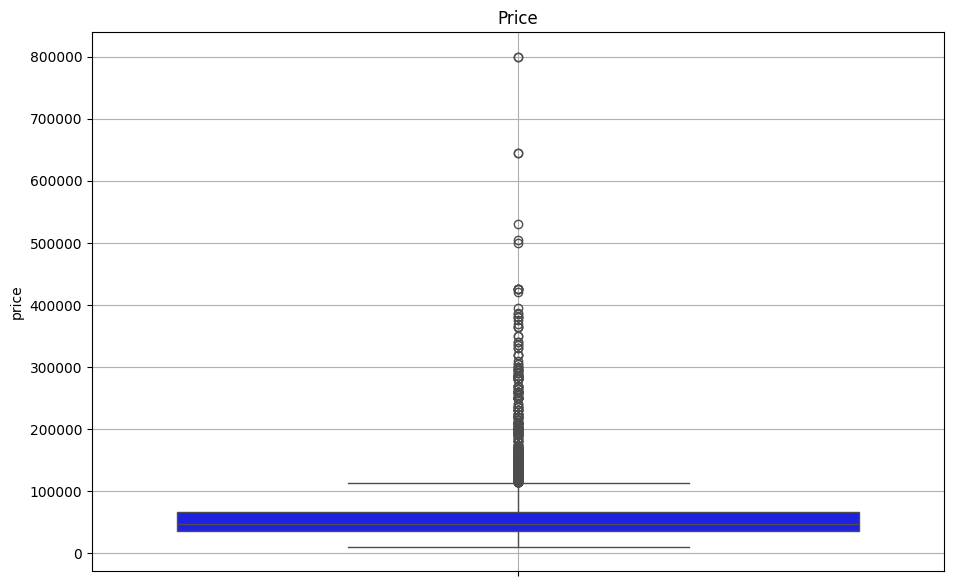

In [14]:
#search for anomalies
plt.figure(figsize=(11, 7))
sns.boxplot(uybor['price'], color='blue')
plt.title('Price')
plt.grid(True)
plt.show()

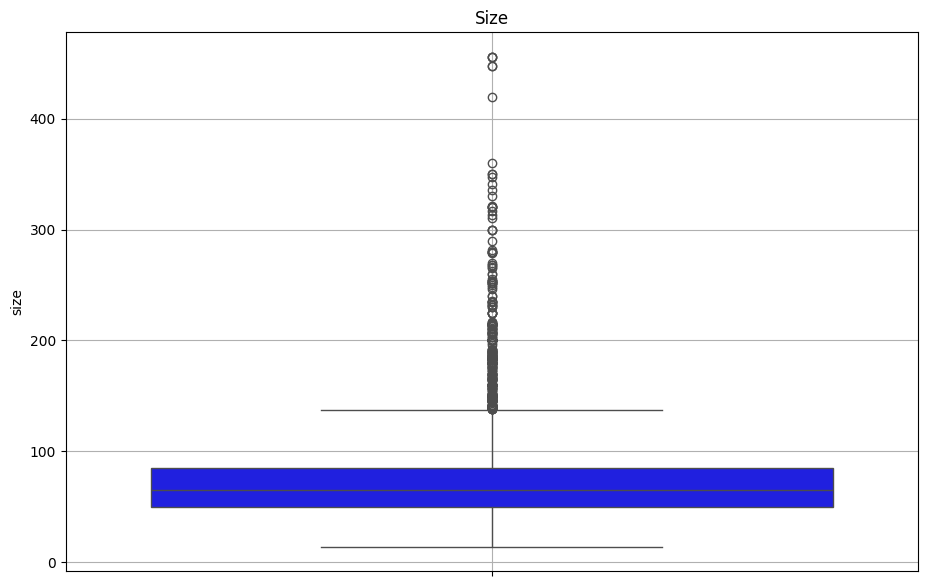

In [16]:
plt.figure(figsize=(11, 7))
sns.boxplot(uybor['size'], color='blue')
plt.title('Size')
plt.grid(True)
plt.show()

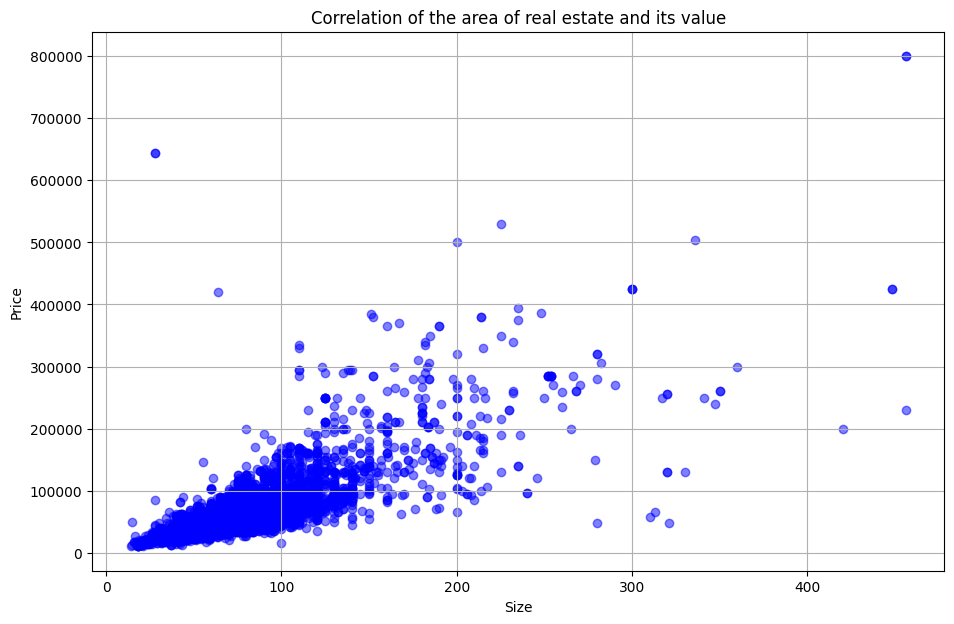

In [17]:
plt.figure(figsize=(11, 7))
plt.scatter(uybor['size'], uybor['price'], color='blue', alpha=0.5)
plt.xlabel('Size')
plt.ylabel('Price')
plt.title('Correlation of the area of real estate and its value')
plt.grid(True)
plt.show()

In [18]:
uybor_corr = uybor.drop(columns=['district'])
uybor_corr.corr()

,rooms,size,level,max_levels,price
rooms,1.000000,0.787697,0.139826,0.184896,0.552582
size,0.787697,1.000000,0.160907,0.276208,0.781830
level,0.139826,0.160907,1.000000,0.593245,0.059276
max_levels,0.184896,0.276208,0.593245,1.000000,0.219737
price,0.552582,0.781830,0.059276,0.219737,1.000000


In [19]:
uybor.to_csv('/data/uybor_ready.csv')